# 내일 비가 올지 예측 (Rain in Australia)
- 참고 : https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
- 랜덤 포레스트(Random Forest)

## 관련 라이브러리 import

In [5]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

## 데이터 준비 
- 아래 링크에서 weatherAUS.csv 파일을 다운로드 받기
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## 데이터 읽기 

In [7]:
df = pd.read_csv('data/weatherAUS.csv')
print(df.shape)

(145460, 23)


## EDA 수행 
### 데이터 형상 파악하기 

In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### 범주형 데이터 통계량 확인 

In [11]:
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
print(cat_columns)
df[cat_columns].describe()

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-24,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


## target(y) 데이터 확인

<Axes: xlabel='RainTomorrow', ylabel='count'>

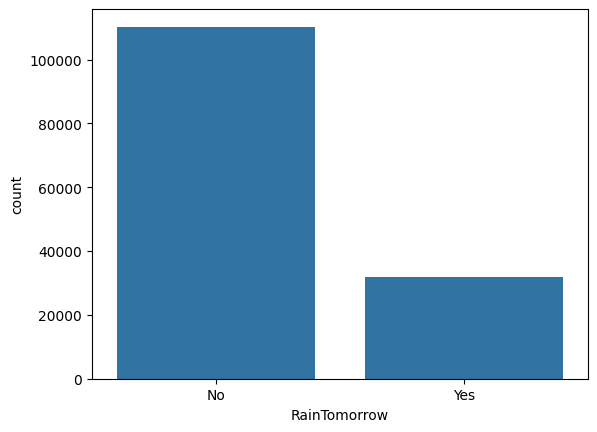

In [13]:
sns.countplot(x="RainTomorrow", data=df)

## 상관 분석(Correlation Analysis) 수행해보기
### 수치형 데이터 확인

In [14]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [15]:
temp_df = df[num_cols]
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


### 범주형 데이터를 수치형으로 변환
- RainToday, RainTomorrow 컬럼의 데이터를 수치형으로 변환
- 변환하여 수치형 데이터 프레임에 추가

In [16]:
# Yes/No 값을 0, 1로 변경하기
temp_df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1}) #.astype(dtype='int')
temp_df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1}) #.astype(dtype='int')

In [17]:
temp_df.shape

(145460, 18)

In [18]:
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


## 상관관계 계수 확인 

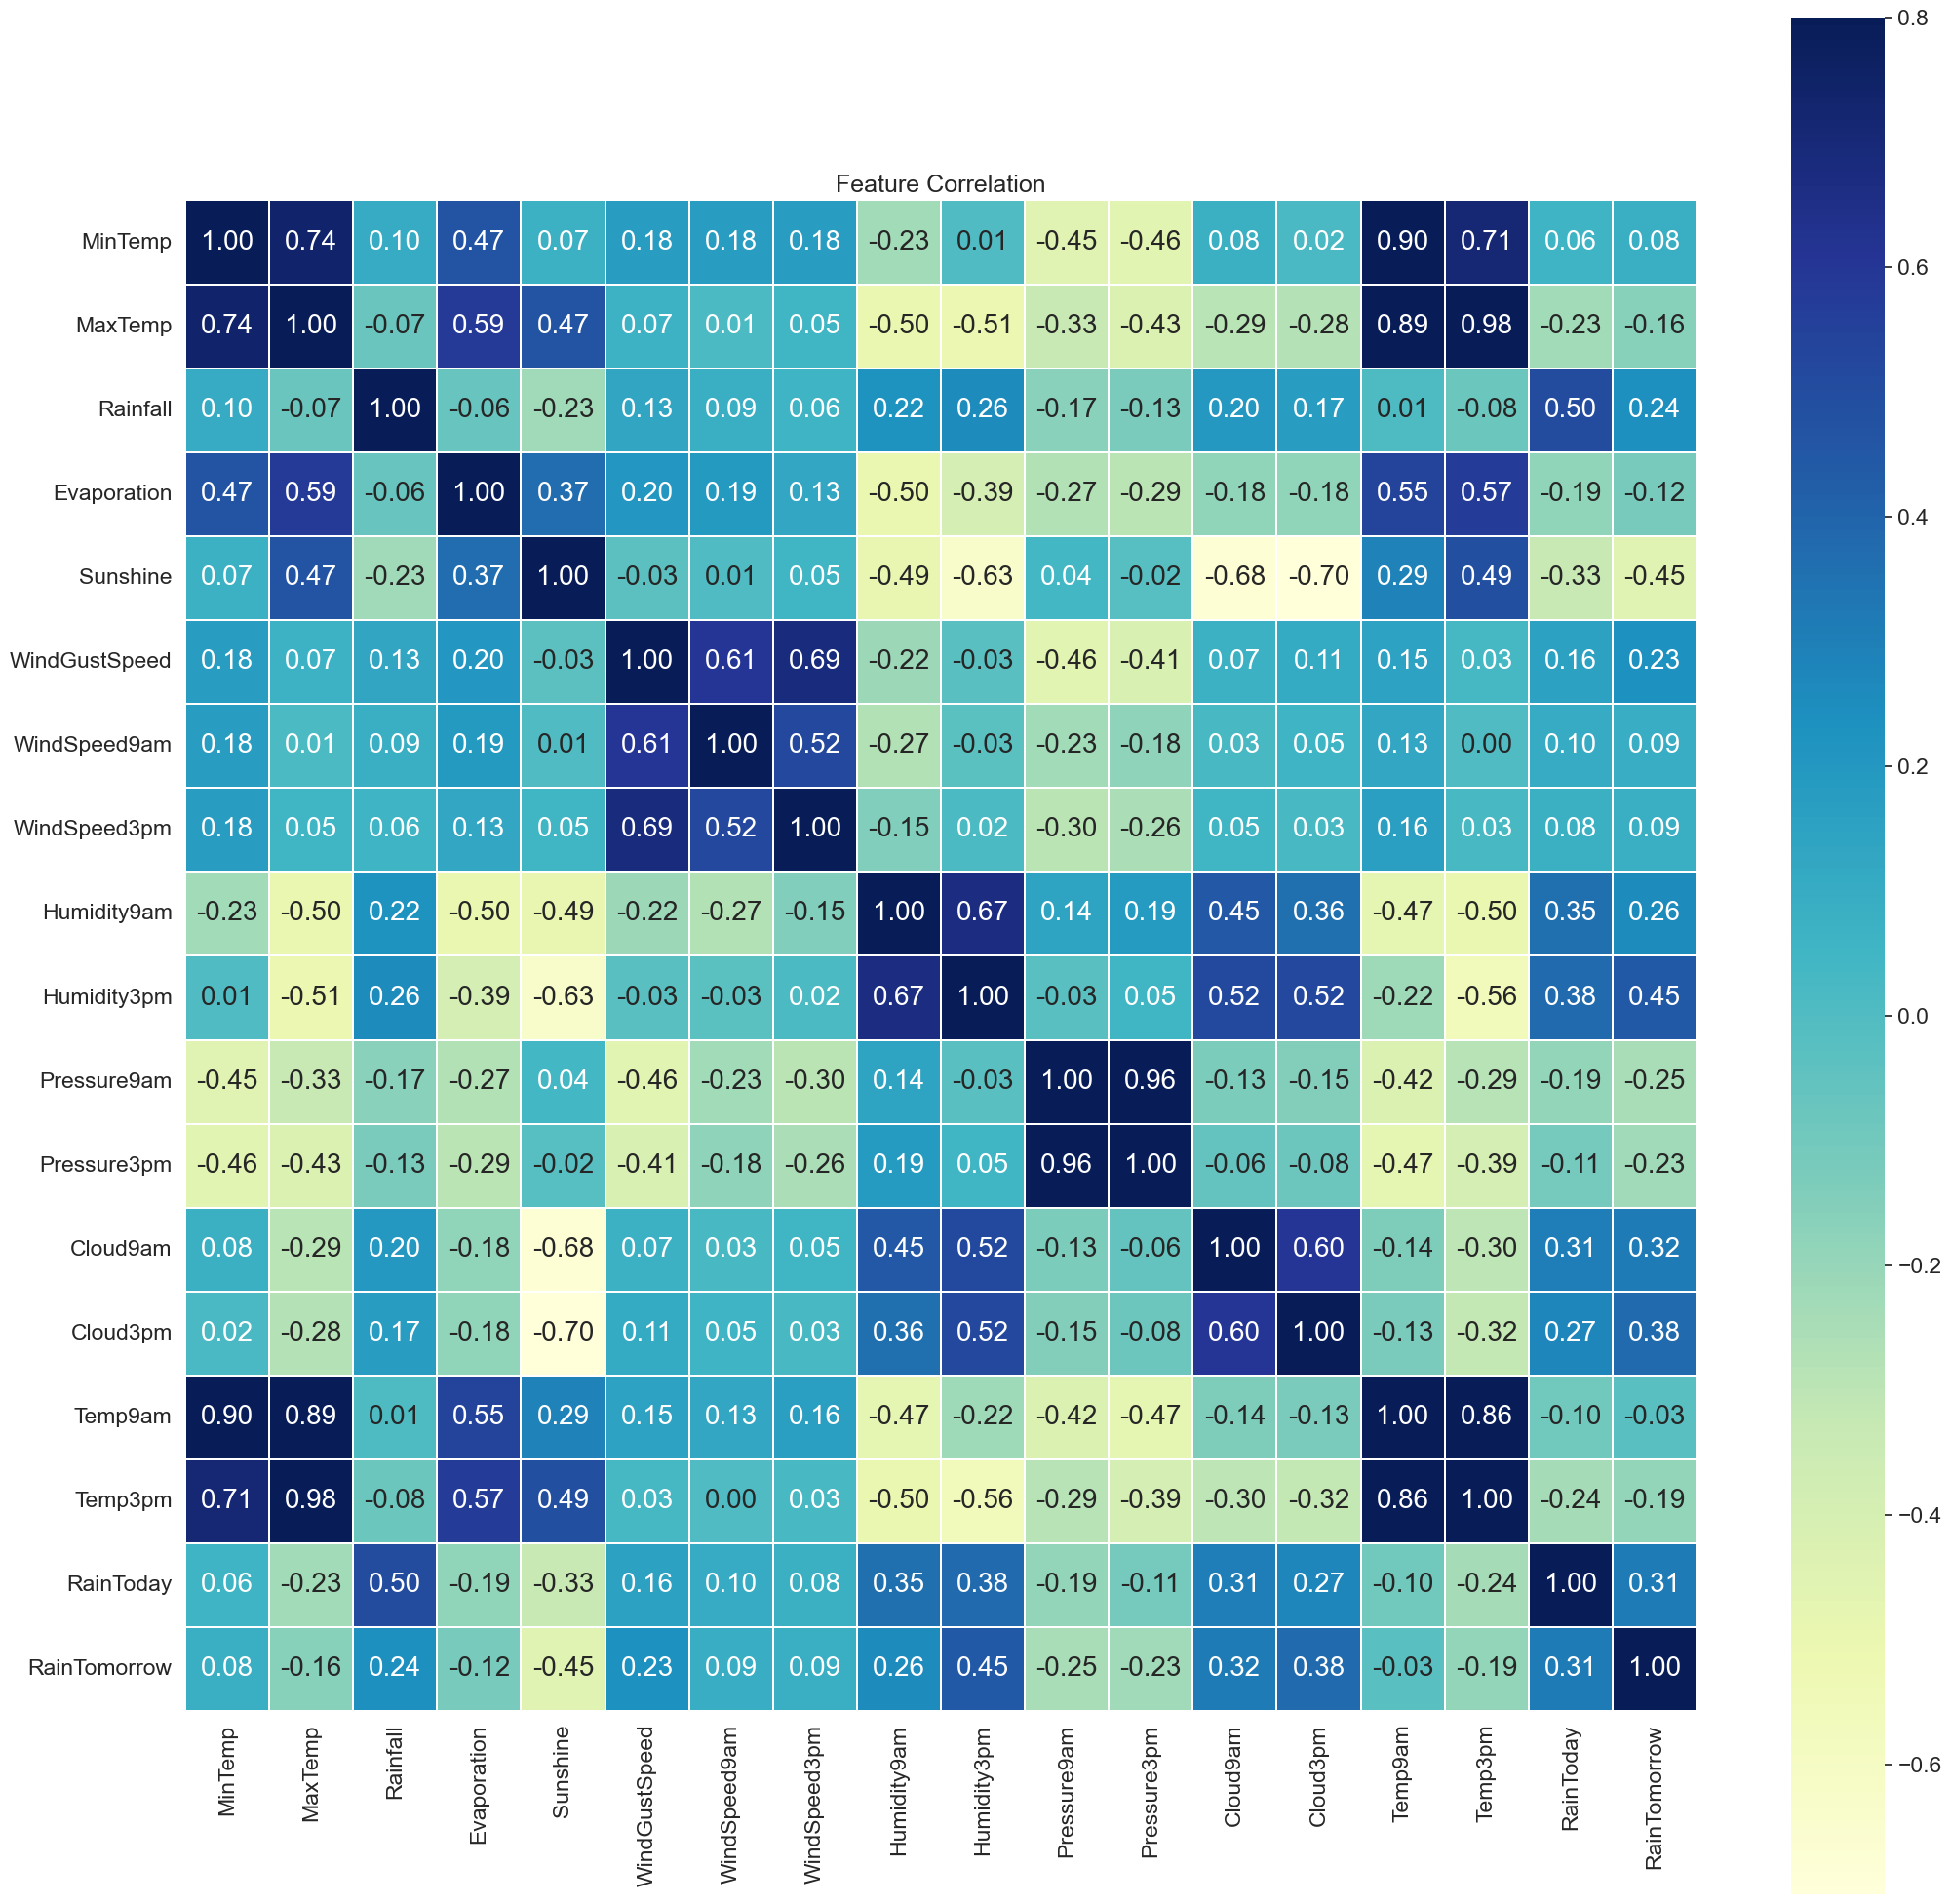

In [19]:
corr = temp_df.corr()
plt.figure(figsize=(25, 25));
sns.set(font_scale=1.5); # plot의 글자크기 설정
sns.heatmap(corr,
            vmax=0.8,
            #vmin=-1,
            linewidths=0.01,
            square=True,
            annot=True,
            fmt = '.2f', # annot의 출력 소숫점 자리 지정
            annot_kws={"size": 20},
            cmap='YlGnBu');
plt.title('Feature Correlation');

## 결측치 처리 
### (null값) 확인하기

In [20]:
# null값의 평균을 계산하여 컬럼별 null의 비율 확인
df.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
MaxTemp          0.008669
MinTemp          0.010209
WindSpeed9am     0.012148
Temp9am          0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
RainToday        0.022419
Rainfall         0.022419
RainTomorrow     0.022460
Temp3pm          0.024811
WindDir3pm       0.029066
Humidity3pm      0.030984
WindGustSpeed    0.070555
WindGustDir      0.070989
WindDir9am       0.072639
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

### categorical column 확인하기

In [21]:
cat_cols = df.select_dtypes(exclude=np.number).columns
print(cat_columns)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


### numerical column 확인하기

In [22]:
num_cols = df.select_dtypes(include=np.number).columns
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


## 결측치 개수 확인하기 

In [23]:
# categorical column의 null 비율
df[cat_cols].isnull().mean().sort_values()

Date            0.000000
Location        0.000000
RainToday       0.022419
RainTomorrow    0.022460
WindDir3pm      0.029066
WindGustDir     0.070989
WindDir9am      0.072639
dtype: float64

In [24]:
# numerical column의 null 비율
df[num_cols].isnull().mean().sort_values()

MaxTemp          0.008669
MinTemp          0.010209
WindSpeed9am     0.012148
Temp9am          0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
Rainfall         0.022419
Temp3pm          0.024811
Humidity3pm      0.030984
WindGustSpeed    0.070555
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

## 결측치 채우기
### 수치형 컬럼 결측처리
- numerical value를 가진 column은 중위값(meidan)으로 채우기

In [25]:
#df['Sunshine'].fillna(df['Sunshine'].median(), inplace = True)
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())

In [26]:
# numerical value를 가진 column은 중위값(meidan)으로 결측치 채우기
for col in num_cols:
    if df[col].isnull().mean() > 0:
        col_median = df[col].median()
        # df[col].fillna(col_median, inplace = True)
        df[col] = df[col].fillna(col_median) # 위와 같음

## 결측치 채우기
### 범주형 컬럼 결측처리
- null이 있는 범주형 컬럼 확인

In [27]:
# categorical 커럼에서 0 이상인것 출력 확인
for col in cat_cols:
    if df[col].isnull().mean() > 0:
        print(col, (df[col].isnull().mean()))

WindGustDir 0.0709885879279527
WindDir9am 0.07263852605527293
WindDir3pm 0.02906641000962464
RainToday 0.022418534304963565
RainTomorrow 0.02245978275814657


In [28]:
# df['WindGustDir'].mode() # 해당 값을 뽑을 수 없음 아래 방식 사용해야함 
df['WindGustDir'].mode()[0]

'W'

In [29]:
# 방법1
# categorical value를 가진 column은 최빈값(mode)으로 결측치 채우기
# RainTomorrow 는 target 이기 때문에 결측치 처리하지 않음.(일반적인 선택)
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [33]:
cat_cols= list(cat_cols)
cat_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [34]:
# RainTomorrow 는 우리가 예측할 y에 해당 = target 이기 때문에 결측치 처리하지 않음.(일반적인 선택)
cat_cols.remove('RainTomorrow')
cat_cols

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

- 범주형 데이터의 null 값을 최빈값으로 채워넣기

In [41]:
# numerical value를 가진 column은 중위값(meidan)으로 결측치 채우기
for col in cat_cols:
    if df[col].isnull().mean() > 0:
        # col_mode = df[col].mode()[0]
        # df[col]= df[col].fillna(cal_mode)
        # 위 두줄을 한번에 표기하기 
        df[col]= df[col].fillna(df[col].mode()[0])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [43]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

## [문제] 필요 없는 컬럼 삭제
- data 컬럼 삭제

In [44]:
# 날짜는 필요하지 않음로 column drop하기 
df= df.drop('Date', axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [45]:
df.isnull().mean().sort_values()

Location         0.00000
MinTemp          0.00000
MaxTemp          0.00000
Rainfall         0.00000
Evaporation      0.00000
Sunshine         0.00000
WindGustDir      0.00000
WindGustSpeed    0.00000
WindDir9am       0.00000
WindDir3pm       0.00000
WindSpeed9am     0.00000
WindSpeed3pm     0.00000
Humidity9am      0.00000
Humidity3pm      0.00000
Pressure9am      0.00000
Pressure3pm      0.00000
Cloud9am         0.00000
Cloud3pm         0.00000
Temp9am          0.00000
Temp3pm          0.00000
RainToday        0.00000
RainTomorrow     0.02246
dtype: float64

## target의 null 값처리
- RainTomorrow는 target이기 때문에 nan은 drop으로 처리
- RainTomorrow 예측 값이므로 null 값 삭제함

In [46]:
df.shape

(145460, 22)

In [47]:
df.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

## [문제] RainTomorrow 컬럼에 null이 있는 모든 행 삭제

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [53]:
#df = df[df['RainTomorrow'].notnull()]
# df에서 RainTomorrow에 null이 있으면 해당 행 삭제함
df = df.dropna(subset=['RainTomorrow'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-null  fl

In [55]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Yes/No 값에 대한 변환

In [56]:
# Yes/No 값을 0, 1로 변경하기
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})

## categorical value에 one-hot encoding 적용하기

In [57]:
cat_cols

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [58]:
#RainToday는 0 1 되어있어서 빼고 진행 
df = pd.get_dummies(df, columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [59]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [60]:
df.shape

(142193, 115)

# ML을 위한 학습, 테스트 데이터 준비

In [63]:
# 문제 해결, X, y 데이터 준비
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow'] 

In [64]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [65]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

## [문제] 학습 테스트 데이터 분할
- test_size=0.3, stratify=y, random_state=2023

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=2023, 
    shuffle=True,        # 데이터 섞기
    stratify=y           # y 비율을 train/test에 동일하게 유지
)

# ML 모델 학습
## 결정 트리(Decision Tree)로 내일 비가 올지 안올지 예측해보기
### [문제] 모델 객체 생성 및 학습

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # 1-6 

# 모델 객체 생성 및 학습
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf

dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [70]:
score = accuracy_score(y_test,y_pred)
print('결정 트리(Decision Tree) Accuracy :',score)

결정 트리(Decision Tree) Accuracy : 0.7857871233165723


###  [문제] 정확도, 정밀도, 재현율, f1-스코아를 값을 확인해 보세요.

In [78]:
from sklearn.metrics import classification_report, accuracy_score #1-6

y_pred[:5]
y_test[:5].values
accuracy_score(y_test, y_pred)

# Predict를 수행하고 classification_report() 결과 출력
y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     22064
           1       0.52      0.54      0.53      6375

    accuracy                           0.79     28439
   macro avg       0.69      0.70      0.70     28439
weighted avg       0.79      0.79      0.79     28439



## 랜덤 포레스트(Random Forest)로
- 참고 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- DT default = 100개를 만들어서 학습을 시킴

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [80]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [81]:
# 정확도 평가
score = accuracy_score(y_test, y_pred)
print('랜덤 포레스트(Random Forest) Accuracy :', score)

랜덤 포레스트(Random Forest) Accuracy : 0.8571328105770245


In [82]:
from sklearn.metrics import classification_report
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22064
           1       0.78      0.50      0.61      6375

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.85     28439



## xgboost

In [89]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8572684436317604
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     21996
           1       0.75      0.56      0.64      6442

    accuracy                           0.86     28438
   macro avg       0.81      0.75      0.78     28438
weighted avg       0.85      0.86      0.85     28438



# 시각화하기

In [90]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.84, 0.88, 0.90],
    'F1-score': [0.81, 0.86, 0.89]
})

display(results)


,Model,Accuracy,F1-score
0,Decision Tree,0.84,0.81
1,Random Forest,0.88,0.86
2,XGBoost,0.90,0.89


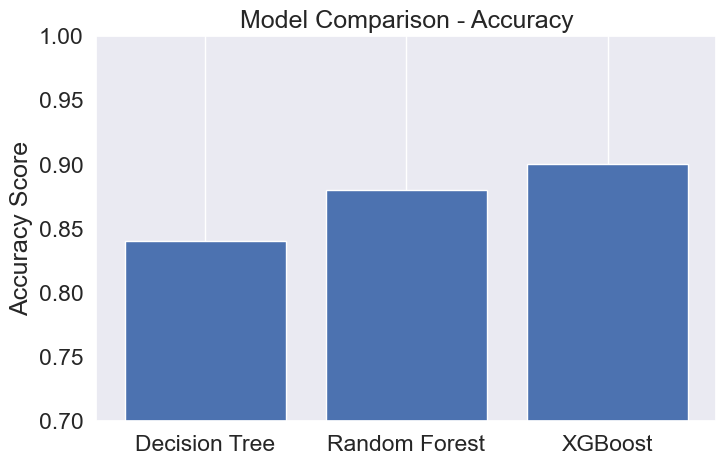

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['Accuracy'])
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0.7, 1.0)
plt.grid(axis='y')
plt.show()


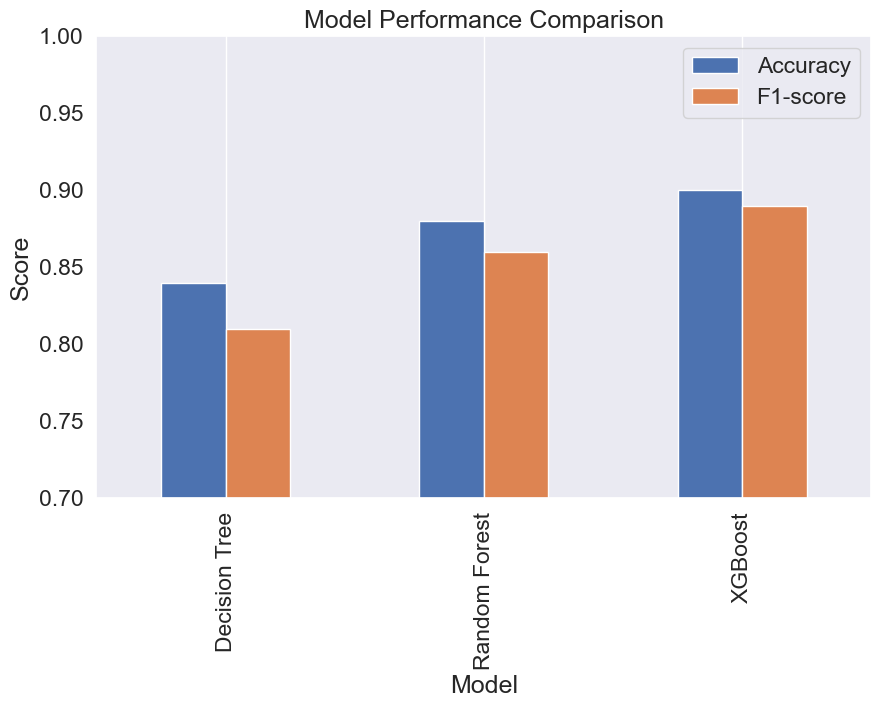

In [92]:
results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.grid(axis='y')
plt.show()


## 결과해석 
🔹 일반적으로 Accuracy, F1-score 모두 클수록 좋은 모델  
→ 1.0(100%)에 가까울수록 성능이 좋다고 볼 수 있음  

Accuracy 기준: XGBoost > Random Forest > Decision Tree  
F1-score 기준: XGBoost > Random Forest > Decision Tree  

→ 두 지표 모두에서 XGBoost가 가장 우수.  